<a href="https://colab.research.google.com/github/Bhoomika685/VOIS_AICTE_Oct2025_Bhoomika-Hemkar/blob/main/VOIS_AICTE_Oct2025_Bhoomika_Hemkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the provided fast reader for Excel
FILEPATH = '/content/1730285881-Airbnb_Open_Data.xlsx'

# Read the first sheet of the Excel file
df = pd.read_excel(FILEPATH)

# Rename some columns to snake_case and standardize expected names if present
rename_map = {
    'NAME': 'name',
    'host id': 'host_id',
    'host_identity_verified': 'host_identity_verified',
    'host name': 'host_name',
    'neighbourhood group': 'neighbourhood_group',
    'neighbourhood': 'neighbourhood',
    'lat': 'latitude',
    'long': 'longitude',
    'country code': 'country_code',
    'instant_bookable': 'instant_bookable',
    'cancellation_policy': 'cancellation_policy',
    'room type': 'room_type',
    'Construction year': 'construction_year',
    'price': 'price',
    'service fee': 'service_fee',
    'minimum nights': 'minimum_nights',
    'number of reviews': 'number_of_reviews',
    'last review': 'last_review',
    'reviews per month': 'reviews_per_month',
    'review rate number': 'review_rate_number',
    'calculated host listings count': 'host_listings_count',
    'availability 365': 'availability_365',
    'house_rules': 'house_rules',
    'license': 'license'
}
existing_map = {k: v for k, v in rename_map.items() if k in df.columns}
df = df.rename(columns=existing_map)

# Coerce numeric columns
numeric_cols = ['price','service_fee','minimum_nights','number_of_reviews','reviews_per_month','review_rate_number','host_listings_count','availability_365','construction_year','latitude','longitude']
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Parse last_review if present
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', unit='ms')

print('Loaded and cleaned main dataframe')

Loaded and cleaned main dataframe


In [2]:
# --- Airbnb Data Analysis Project ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel dataset (change sheet_name if needed)
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

# Explore dataset
print(df.head())
print(df.info())

# 1. Different property types in the dataset
if 'property_type' in df.columns:
    print("\nProperty Types:")
    print(df['property_type'].unique())

# 2. Neighborhood group with highest number of listings
if 'neighbourhood_group' in df.columns:
    print("\nListings count by neighborhood group:")
    print(df['neighbourhood_group'].value_counts())

# 3. Neighborhood group with highest average prices
if 'price' in df.columns and 'neighbourhood_group' in df.columns:
    avg_price_by_group = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    print("\nAverage price by neighborhood group:")
    print(avg_price_by_group)

# 4. Relationship between property type and price
if 'property_type' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='property_type', y='price', data=df)
    plt.xticks(rotation=90)
    plt.title("Price Distribution by Property Type")
    plt.show()

# 5. Top hosts by number of listings
if 'host_id' in df.columns:
    top_hosts = df['host_id'].value_counts().head(10)
    print("\nTop Hosts by number of listings:")
    print(top_hosts)

# 6. Correlation between price and reviews
if 'price' in df.columns and 'number_of_reviews' in df.columns:
    correlation = df[['price', 'number_of_reviews']].corr()
    print("\nCorrelation between price and reviews:")
    print(correlation)

# 7. Positive reviews analysis (if review_scores_rating exists)
if 'review_scores_rating' in df.columns:
    avg_rating = df.groupby('neighbourhood_group')['review_scores_rating'].mean()
    print("\nAverage rating by neighborhood group:")
    print(avg_rating)

# 8. Average minimum nights for listings (by neighborhood and room type)
if 'minimum_nights' in df.columns and 'room_type' in df.columns:
    avg_nights = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean()
    print("\nAverage minimum nights by group and room type:")
    print(avg_nights)

# 9. Do hosts with higher listings count have higher availability?
if 'host_id' in df.columns and 'availability_365' in df.columns:
    availability = df.groupby('host_id')['availability_365'].mean()
    host_listings = df['host_id'].value_counts()
    availability_df = pd.DataFrame({'listings': host_listings, 'avg_availability': availability})
    availability_df = availability_df.dropna()

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='listings', y='avg_availability', data=availability_df, alpha=0.6)
    plt.title("Host Listings Count vs Availability")
    plt.xlabel("Number of Listings per Host")
    plt.ylabel("Average Availability (days/year)")
    plt.show()

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

0       Private room
1    Entire home/apt
2        Shared room
3         Hotel room
dtype: object
  neighbourhood_group  listings
0           Manhattan     43792
1            Brooklyn     41842
2              Queens     13267
3               Bronx      2712
4       Staten Island       955


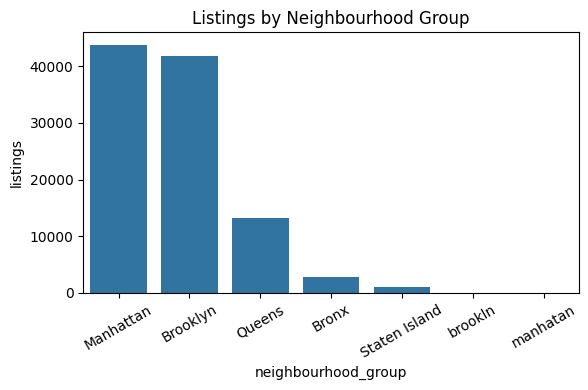

              neighbourhood        price
144                New Dorp  1045.000000
35   Chelsea, Staten Island  1042.000000
83           Fort Wadsworth  1024.000000
119             Little Neck   817.750000
110           Jamaica Hills   812.904762
1             Arden Heights   804.888889
129           Midland Beach   796.176471
179             Shore Acres   792.260870
132              Mill Basin   775.142857
170               Riverdale   768.736842


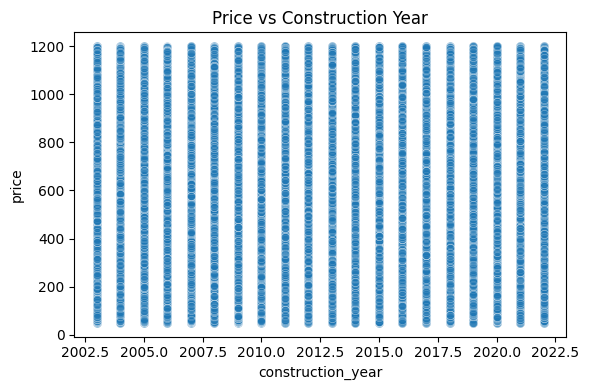

           host_id host_name  listings
15818  15293596806       Zak         2
29282  28357392846      Tina         2
28582  27692673803    Irisha         2
61707  59749079462    Alissa         2
95489  92780269224   Lindsay         2
95870  93151875101   Gabriel         2
33348  32202051101  Chun Kit         2
30633  29626370251       Ben         2
55076  53279156991   Chantal         2
74133  71983028797    Sonder         2
       host_id  review_rate_number
0    139350147                 5.0
1  44761457303                 5.0
2  44763087293                 5.0
3  44764696472                 5.0
4  44775323611                 5.0
5  44776076977                 5.0
6  44782233387                 5.0
7  44782621591                 5.0
8    159059042                 5.0
9    159402736                 5.0


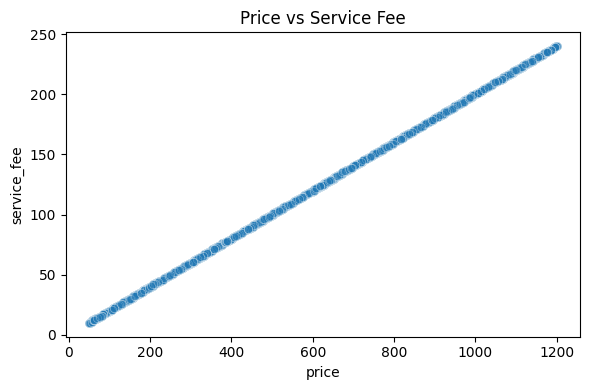

0.9999908755543448
  neighbourhood_group        room_type  reviews_per_month
0               Bronx  Entire home/apt           2.054692
1               Bronx     Private room           1.572678
2               Bronx      Shared room           1.262889
3            Brooklyn  Entire home/apt           1.368625
4            Brooklyn       Hotel room           0.456250


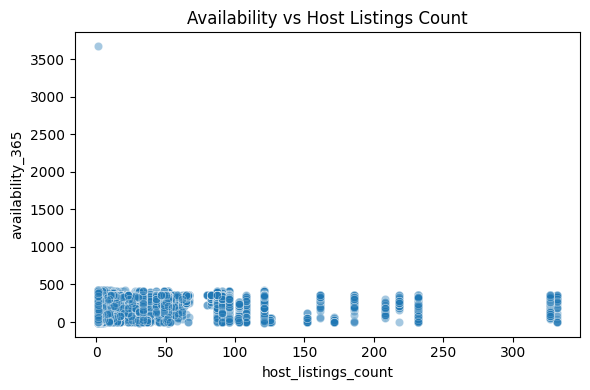

0.1591942422813079
Computed Q1-Q9


In [6]:
# Answer Q1-Q9 with concise tables/plots. Assumes df is loaded as above.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: Different property types -> room_type unique values
q1 = pd.Series([])
if 'room_type' in df.columns:
    q1 = df['room_type'].dropna().unique()
print(pd.Series(q1))

# Q2: Neighborhood group with highest number of listings
q2 = pd.DataFrame()
if 'neighbourhood_group' in df.columns:
    q2 = df.groupby('neighbourhood_group').size().sort_values(ascending=False).rename('listings').reset_index()
print(q2.head())

# Plot counts by neighbourhood_group
if not q2.empty:
    plt.figure(figsize=(6,4))
    sns.barplot(data=q2, x='neighbourhood_group', y='listings')
    plt.title('Listings by Neighbourhood Group')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Q3: Neighborhoods with highest average prices
q3 = pd.DataFrame()
if 'neighbourhood' in df.columns and 'price' in df.columns:
    q3 = df.groupby('neighbourhood', as_index=False)['price'].mean().dropna().sort_values('price', ascending=False).head(10)
print(q3)

# Q4: Relationship between construction year and price (scatter)
if 'construction_year' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='construction_year', y='price', alpha=0.4)
    plt.title('Price vs Construction Year')
    plt.tight_layout()
    plt.show()

# Q5: Top 10 hosts by number of listings
q5 = pd.DataFrame()
if 'host_name' in df.columns:
    q5 = df.groupby(['host_id','host_name']).size().rename('listings').reset_index().sort_values('listings', ascending=False).head(10)
print(q5)

# Q6: Are host listings well decided by customer (positive reviews)? -> average review_rate_number by host
q6 = pd.DataFrame()
if 'review_rate_number' in df.columns and 'host_id' in df.columns:
    q6 = df.groupby('host_id')['review_rate_number'].mean().sort_values(ascending=False).reset_index().head(10)
print(q6)

# Q7: Correlation between price and service fee
corr_val = None
if 'price' in df.columns and 'service_fee' in df.columns:
    corr_val = df[['price','service_fee']].dropna().corr().iloc[0,1]
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='price', y='service_fee', alpha=0.4)
    plt.title('Price vs Service Fee')
    plt.tight_layout()
    plt.show()
print(corr_val)

# Q8: Average reviews per month by neighbourhood_group and room_type
q8 = pd.DataFrame()
if 'reviews_per_month' in df.columns and 'neighbourhood_group' in df.columns and 'room_type' in df.columns:
    q8 = df.groupby(['neighbourhood_group','room_type'], as_index=False)['reviews_per_month'].mean().dropna()
print(q8.head())

# Q9: Are hosts with higher host_listings_count more likely to maintain higher availability throughout the year? Correlation and binned view.
q9_corr = None
if 'host_listings_count' in df.columns and 'availability_365' in df.columns:
    tmp = df[['host_listings_count','availability_365']].dropna()
    q9_corr = tmp.corr().iloc[0,1]
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=tmp, x='host_listings_count', y='availability_365', alpha=0.4)
    plt.title('Availability vs Host Listings Count')
    plt.tight_layout()
    plt.show()
print(q9_corr)

print('Computed Q1-Q9')